<a href="https://colab.research.google.com/github/Carlosmagnobrusil/StockX_sale_price_prediction-/blob/main/StockX.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Estudio de variacion de los precios**
## *Creado por: Carlos Brusil*



*   Fecha de Creación: 21 de febrero de 2022 
*   Fechad de actualización: 22 de febrero de 2022
*   Descripción: En el presente script se busca trabajar la base de datos de Sock X una tienda en linea de reventa de zapatos, la cual busca reponder cuales son las variables que determinan el precio de reventa.

## Carga de datos y librerías principales 

In [ ]:
from google.colab import drive
drive.mount('/content/drive') # uno my Drive al nuevo cuaderno

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd #importo la libreria panda permite manipular y molderar los datos 
import numpy as np #importo la libreria numpy manipular y molderar los datos 
import matplotlib.pyplot as plt #importo libreria matplotlib que es una libreria que me permite realizar graficas en 2 dimensiones de de mis datos
import seaborn as sns #Esta libreria nos permite modificar la vizualizacion de los datos atraves de los coleres y mejorar presetancion de los mismo 

In [ ]:
stock =  '/content/drive/MyDrive/Coding_Dojo/Proyecto 2 /Data/StockX-Data-Contest-2019-3.csv' #Nombro a la base
stockx_df = pd.read_csv(stock) #le doy un nombre a la trama tener en cuenta que tipo dearchivo estoy leyendo
stockx_df #Observo que los datos hayan sido leidos de forma correcta

,Order Date,Brand,Sneaker Name,Sale Price,Retail Price,Release Date,Shoe Size,Buyer Region
0,9/1/17,Yeezy,Adidas-Yeezy-Boost-350-Low-V2-Beluga,"$1,097",$220,9/24/16,11.0,California
1,9/1/17,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Copper,$685,$220,11/23/16,11.0,California
2,9/1/17,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Green,$690,$220,11/23/16,11.0,California
3,9/1/17,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Red,"$1,075",$220,11/23/16,11.5,Kentucky
4,9/1/17,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Red-2017,$828,$220,2/11/17,11.0,Rhode Island
...,...,...,...,...,...,...,...,...
99951,2/13/19,Yeezy,adidas-Yeezy-Boost-350-V2-Static-Reflective,$565,$220,12/26/18,8.0,Oregon
99952,2/13/19,Yeezy,adidas-Yeezy-Boost-350-V2-Static-Reflective,$598,$220,12/26/18,8.5,California
99953,2/13/19,Yeezy,adidas-Yeezy-Boost-350-V2-Static-Reflective,$605,$220,12/26/18,5.5,New York
99954,2/13/19,Yeezy,adidas-Yeezy-Boost-350-V2-Static-Reflective,$650,$220,12/26/18,11.0,California


## Exploración de la base 

In [ ]:
stockx_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99956 entries, 0 to 99955
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Order Date    99956 non-null  object 
 1   Brand         99956 non-null  object 
 2   Sneaker Name  99956 non-null  object 
 3   Sale Price    99956 non-null  object 
 4   Retail Price  99956 non-null  object 
 5   Release Date  99956 non-null  object 
 6   Shoe Size     99956 non-null  float64
 7   Buyer Region  99956 non-null  object 
dtypes: float64(1), object(7)
memory usage: 6.1+ MB


In [ ]:
stockx_df.columns= stockx_df.columns.str.lower()#primero defino a todos los nombres de las columnas en letra minuscula

In [ ]:
stockx_df.columns = stockx_df.columns.str.replace(' ', '_') #en esta linea realizo el cambio de los espacios del nombre de las columnas por 
#el '_' 

In [ ]:
stockx_df['sneaker_name'] = stockx_df['sneaker_name'].str.upper() #convierto todos los nombres de mi columna en mayusculas 

In [ ]:
stockx_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99956 entries, 0 to 99955
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   order_date    99956 non-null  object 
 1   brand         99956 non-null  object 
 2   sneaker_name  99956 non-null  object 
 3   sale_price    99956 non-null  object 
 4   retail_price  99956 non-null  object 
 5   release_date  99956 non-null  object 
 6   shoe_size     99956 non-null  float64
 7   buyer_region  99956 non-null  object 
dtypes: float64(1), object(7)
memory usage: 6.1+ MB


In [ ]:
stockx_df['brand'].unique()

array([' Yeezy', 'Off-White'], dtype=object)

In [ ]:
stockx_df['sneaker_name'].unique()

array(['ADIDAS-YEEZY-BOOST-350-LOW-V2-BELUGA',
       'ADIDAS-YEEZY-BOOST-350-V2-CORE-BLACK-COPPER',
       'ADIDAS-YEEZY-BOOST-350-V2-CORE-BLACK-GREEN',
       'ADIDAS-YEEZY-BOOST-350-V2-CORE-BLACK-RED',
       'ADIDAS-YEEZY-BOOST-350-V2-CORE-BLACK-RED-2017',
       'ADIDAS-YEEZY-BOOST-350-V2-CORE-BLACK-WHITE',
       'ADIDAS-YEEZY-BOOST-350-V2-CREAM-WHITE',
       'ADIDAS-YEEZY-BOOST-350-V2-ZEBRA',
       'ADIDAS-YEEZY-BOOST-350-LOW-MOONROCK', 'NIKE-AIR-MAX-90-OFF-WHITE',
       'NIKE-AIR-PRESTO-OFF-WHITE', 'NIKE-AIR-VAPORMAX-OFF-WHITE',
       'AIR-JORDAN-1-RETRO-HIGH-OFF-WHITE-CHICAGO',
       'NIKE-BLAZER-MID-OFF-WHITE',
       'ADIDAS-YEEZY-BOOST-350-LOW-PIRATE-BLACK-2016',
       'ADIDAS-YEEZY-BOOST-350-LOW-OXFORD-TAN',
       'ADIDAS-YEEZY-BOOST-350-LOW-TURTLEDOVE',
       'ADIDAS-YEEZY-BOOST-350-LOW-PIRATE-BLACK-2015',
       'ADIDAS-YEEZY-BOOST-350-V2-SEMI-FROZEN-YELLOW',
       'NIKE-AIR-FORCE-1-LOW-OFF-WHITE', 'NIKE-AIR-MAX-97-OFF-WHITE',
       'NIKE-AIR-FORCE-1-LOW-VIRGIL

In [ ]:
number_of_siluettes = len(stockx_df['sneaker_name'].unique())
print("Numero de Siluetas  que existen en la base de datos:", number_of_siluettes)

Numero de Siluetas  que existen en la base de datos: 50


##### Durante la priemra explaración se ha tomado un pequeño vistazo a la base, esta base parce bastante limpia ya que no cuenta con valores perdidos, además se revisa dos de las varables mas importantes dentro del **"Sneaker Game"** es decir el mecado de reventa de zapatos, estas son la marca donde se devela que el estudio solo cuenta con dos marcas y estas son NIKE en su colaboración con la marca OFF WHITE del difunto diseñador Virgil Abloh y Adidas con su marca YEZZY del rapero y diseñador Kayne West dos iconos de la cultura pop en los ultimos años. dentro de esto podemos observar que la marca Nike cuenta con su coleccion de 10 y Adidas con la silueta Yezzy 350 en sus diferentes color ways. 

##### Para mayor informacion podemos revisar los siguientes Links 
* https://www.farfetch.com/uk/style-guide/how-to/the-history-of-the-yeezy-boost-350/

* https://www.nssmag.com/en/fashion/12262/virgil-abloh-explains-the-off-white-x-nike-collection-the-ten
  

In [ ]:
prices = ['retail_price',"sale_price"]

for p in prices:
    stockx_df[p] = stockx_df[p].str.replace('$','')
    


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  after removing the cwd from sys.path.


In [ ]:
prices = ['retail_price',"sale_price"]

for p in prices:
    stockx_df[p] = stockx_df[p].str.replace(',','')
    

In [ ]:
prices = ['retail_price',"sale_price"]

for p in prices:
    stockx_df[p] = stockx_df[p].astype(str).astype(int)

In [ ]:
dates = ["order_date","release_date"]

for d in dates:
    stockx_df[d] = stockx_df[d].astype("datetime64")

In [ ]:
categoricals = ["brand", "sneaker_name", "buyer_region" ]

for c in categoricals:
  stockx_df[c] = stockx_df[c].astype('category')

In [ ]:
stockx_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99956 entries, 0 to 99955
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   order_date    99956 non-null  datetime64[ns]
 1   brand         99956 non-null  category      
 2   sneaker_name  99956 non-null  category      
 3   sale_price    99956 non-null  int64         
 4   retail_price  99956 non-null  int64         
 5   release_date  99956 non-null  datetime64[ns]
 6   shoe_size     99956 non-null  float64       
 7   buyer_region  99956 non-null  category      
dtypes: category(3), datetime64[ns](2), float64(1), int64(2)
memory usage: 4.1 MB


## Primeras impresiones 

In [ ]:
round(stockx_df.groupby(["brand","sneaker_name"])["sale_price"].mean(),2) #ojo revisar esta clasificación 

brand      sneaker_name                                  
 Yeezy     ADIDAS-YEEZY-BOOST-350-LOW-MOONROCK                996.71
           ADIDAS-YEEZY-BOOST-350-LOW-OXFORD-TAN             1011.51
           ADIDAS-YEEZY-BOOST-350-LOW-PIRATE-BLACK-2015       895.09
           ADIDAS-YEEZY-BOOST-350-LOW-PIRATE-BLACK-2016       984.24
           ADIDAS-YEEZY-BOOST-350-LOW-TURTLEDOVE             1531.66
                                                              ...   
Off-White  NIKE-ZOOM-FLY-MERCURIAL-OFF-WHITE-BLACK            354.13
           NIKE-ZOOM-FLY-MERCURIAL-OFF-WHITE-TOTAL-ORANGE     287.91
           NIKE-ZOOM-FLY-OFF-WHITE                            534.82
           NIKE-ZOOM-FLY-OFF-WHITE-BLACK-SILVER               316.69
           NIKE-ZOOM-FLY-OFF-WHITE-PINK                       271.17
Name: sale_price, Length: 100, dtype: float64

In [ ]:
round(stockx_df.groupby(["brand"])["retail_price"].mean(),2)

brand
 Yeezy       219.87
Off-White    179.38
Name: retail_price, dtype: float64

In [ ]:
Yeezy = 219.87
OffWhite = 179.38
x = Yeezy - OffWhite 
y = np.around((x / OffWhite)*100,2)
print("La diferencia de precios de salida de Yeezy supera a Off-White en ", y ,"%")

La diferencia de precios de salida de Yeezy supera a Off-White en  22.57 %


In [ ]:
round(stockx_df.groupby(["brand"])["sale_price"].mean(),2)

brand
 Yeezy       360.03
Off-White    671.48
Name: sale_price, dtype: float64

In [ ]:
Yeezys = 360.03
OffWhites = 671.48
x1 =  OffWhites - Yeezys
y1 = np.around((x1 / Yeezys )*100,2)
print("La diferencia de precios de salida de Yeezy supera a Off-White en ", y1 ,"%")

La diferencia de precios de salida de Yeezy supera a Off-White en  86.51 %


In [ ]:
OffWhites/OffWhite

3.743338164789832

##### Dentro de esta exploracion preliminar encontramos que la marca Yezzy tiene un precio de salida mayor al de Off-White, con un 22.57% de diferencia, sin embargo, el publico paga mas en reventa por un par Off-white con una diferencia del 86.51%

### Graficos de las primeras impresiones 

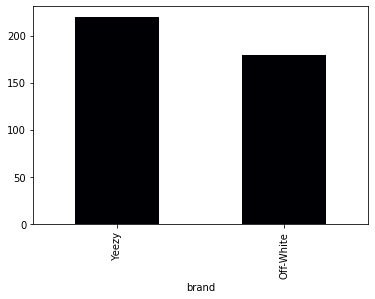

In [ ]:
round(stockx_df.groupby(["brand"])["retail_price"].mean(),2).plot(kind = "bar", colormap = "inferno")

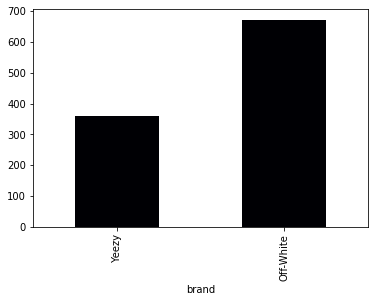

In [ ]:
round(stockx_df.groupby(["brand"])["sale_price"].mean(),2).plot(kind = "bar", colormap = "inferno")

## Manipulación de la base 

In [ ]:
#separo mis base la columna snaker name 
stockx_df1 = stockx_df.copy()
stockx_df1['sneaker_name'] = stockx_df1['sneaker_name'].str.upper() #convierto todos los nombres de mi columna en mayusculas 


In [ ]:
stockx_df1.head(5)

,order_date,brand,sneaker_name,sale_price,retail_price,release_date,shoe_size,buyer_region
0,2017-09-01,Yeezy,ADIDAS-YEEZY-BOOST-350-LOW-V2-BELUGA,1097,220,2016-09-24,11.0,California
1,2017-09-01,Yeezy,ADIDAS-YEEZY-BOOST-350-V2-CORE-BLACK-COPPER,685,220,2016-11-23,11.0,California
2,2017-09-01,Yeezy,ADIDAS-YEEZY-BOOST-350-V2-CORE-BLACK-GREEN,690,220,2016-11-23,11.0,California
3,2017-09-01,Yeezy,ADIDAS-YEEZY-BOOST-350-V2-CORE-BLACK-RED,1075,220,2016-11-23,11.5,Kentucky
4,2017-09-01,Yeezy,ADIDAS-YEEZY-BOOST-350-V2-CORE-BLACK-RED-2017,828,220,2017-02-11,11.0,Rhode Island


In [ ]:
stockx_df1 = stockx_df1.sneaker_name.apply(lambda x : pd.Series (str (x).split('-')))

In [ ]:
stockx_df1

,0,1,2,3,4,5,6,7,8,9
0,ADIDAS,YEEZY,BOOST,350,LOW,V2,BELUGA,NaN,NaN,NaN
1,ADIDAS,YEEZY,BOOST,350,V2,CORE,BLACK,COPPER,NaN,NaN
2,ADIDAS,YEEZY,BOOST,350,V2,CORE,BLACK,GREEN,NaN,NaN
3,ADIDAS,YEEZY,BOOST,350,V2,CORE,BLACK,RED,NaN,NaN
4,ADIDAS,YEEZY,BOOST,350,V2,CORE,BLACK,RED,2017,NaN
...,...,...,...,...,...,...,...,...,...,...
99951,ADIDAS,YEEZY,BOOST,350,V2,STATIC,REFLECTIVE,NaN,NaN,NaN
99952,ADIDAS,YEEZY,BOOST,350,V2,STATIC,REFLECTIVE,NaN,NaN,NaN
99953,ADIDAS,YEEZY,BOOST,350,V2,STATIC,REFLECTIVE,NaN,NaN,NaN
99954,ADIDAS,YEEZY,BOOST,350,V2,STATIC,REFLECTIVE,NaN,NaN,NaN


In [ ]:
stockx_df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99956 entries, 0 to 99955
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       99956 non-null  object
 1   1       99956 non-null  object
 2   2       99956 non-null  object
 3   3       99956 non-null  object
 4   4       99956 non-null  object
 5   5       97899 non-null  object
 6   6       60228 non-null  object
 7   7       18053 non-null  object
 8   8       6811 non-null   object
 9   9       31 non-null     object
dtypes: object(10)
memory usage: 7.6+ MB


In [ ]:
stockx_df1[0].unique()

array(['ADIDAS', 'NIKE', 'AIR'], dtype=object)

In [ ]:
stockx_df1[1].unique()

array(['YEEZY', 'AIR', 'JORDAN', 'BLAZER', 'REACT', 'ZOOM'], dtype=object)

In [ ]:
stockx_df1.rename(columns={0:"main_brand", 1:"label", 3:"silhouette",4: "colorway"})


,main_brand,label,2,silhouette,colorway,5,6,7,8,9
0,ADIDAS,YEEZY,BOOST,350,LOW,V2,BELUGA,NaN,NaN,NaN
1,ADIDAS,YEEZY,BOOST,350,V2,CORE,BLACK,COPPER,NaN,NaN
2,ADIDAS,YEEZY,BOOST,350,V2,CORE,BLACK,GREEN,NaN,NaN
3,ADIDAS,YEEZY,BOOST,350,V2,CORE,BLACK,RED,NaN,NaN
4,ADIDAS,YEEZY,BOOST,350,V2,CORE,BLACK,RED,2017,NaN
...,...,...,...,...,...,...,...,...,...,...
99951,ADIDAS,YEEZY,BOOST,350,V2,STATIC,REFLECTIVE,NaN,NaN,NaN
99952,ADIDAS,YEEZY,BOOST,350,V2,STATIC,REFLECTIVE,NaN,NaN,NaN
99953,ADIDAS,YEEZY,BOOST,350,V2,STATIC,REFLECTIVE,NaN,NaN,NaN
99954,ADIDAS,YEEZY,BOOST,350,V2,STATIC,REFLECTIVE,NaN,NaN,NaN


In [ ]:
stockx_df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99956 entries, 0 to 99955
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       99956 non-null  object
 1   1       99956 non-null  object
 2   2       99956 non-null  object
 3   3       99956 non-null  object
 4   4       99956 non-null  object
 5   5       97899 non-null  object
 6   6       60228 non-null  object
 7   7       18053 non-null  object
 8   8       6811 non-null   object
 9   9       31 non-null     object
dtypes: object(10)
memory usage: 7.6+ MB


In [ ]:
print('\n','*'*50,'\n Marcas :', stockx_df1[0].unique(),'\n','*'*50,
      '\n','*'*50,'\n Colaboración :', stockx_df1[1].unique(),'\n','*'*50,
      '\n','*'*50,'\n Siluetas :',stockx_df1[2].unique(),'\n','*'*50,
      '\n','*'*50,'\n Colores :',stockx_df1[3].unique(),'\n','*'*50,
      '\n','*'*50,'\n Otro1 :',stockx_df1[4].unique(),'\n','*'*50,
      '\n','*'*50,'\n Otro2 :',stockx_df1[5].unique(),'\n','*'*50,
      '\n','*'*50,'\n Otro3 :',stockx_df1[6].unique(),'\n','*'*50,
      '\n','*'*50,'\n Otro4 :',stockx_df1[7].unique(),'\n','*'*50,
      '\n','*'*50,'\n Otro5 :',stockx_df1[8].unique(),'\n','*'*50,
      '\n','*'*50,'\n Otro6 :',stockx_df1[9].unique(),'\n','*'*50,)


 ************************************************** 
 Marcas : ['ADIDAS' 'NIKE' 'AIR'] 
 ************************************************** 
 ************************************************** 
 Colaboración : ['YEEZY' 'AIR' 'JORDAN' 'BLAZER' 'REACT' 'ZOOM'] 
 ************************************************** 
 ************************************************** 
 Siluetas : ['BOOST' 'MAX' 'PRESTO' 'VAPORMAX' '1' 'MID' 'FORCE' 'HYPERDUNK' 'FLY'] 
 ************************************************** 
 ************************************************** 
 Colores : ['350' '90' 'OFF' 'RETRO' '1' '97' '2017' 'MERCURIAL'] 
 ************************************************** 
 ************************************************** 
 Otro1 : ['LOW' 'V2' 'OFF' 'WHITE' 'HIGH' 'FLYKNIT'] 
 ************************************************** 
 ************************************************** 
 Otro2 : ['V2' 'CORE' 'CREAM' 'ZEBRA' 'MOONROCK' 'WHITE' nan 'OFF' 'PIRATE'
 'OXFORD' 'TURTLEDOVE' 'SEMI' 'VI

In [ ]:
stockx_df1 = stockx_df1.assign(brand = stockx_df1[0].apply(lambda b:'NIKE' if b == 'AIR' or b == 'NIKE' else 'ADIDAS'))
stockx_df1.head(5)

,0,1,2,3,4,5,6,7,8,9,brand
0,ADIDAS,YEEZY,BOOST,350,LOW,V2,BELUGA,NaN,NaN,NaN,ADIDAS
1,ADIDAS,YEEZY,BOOST,350,V2,CORE,BLACK,COPPER,NaN,NaN,ADIDAS
2,ADIDAS,YEEZY,BOOST,350,V2,CORE,BLACK,GREEN,NaN,NaN,ADIDAS
3,ADIDAS,YEEZY,BOOST,350,V2,CORE,BLACK,RED,NaN,NaN,ADIDAS
4,ADIDAS,YEEZY,BOOST,350,V2,CORE,BLACK,RED,2017,NaN,ADIDAS


In [ ]:
print('\n','*'*50,'\n Marcas :', stockx_df1['brand'].unique(),'\n','*'*50)


 ************************************************** 
 Marcas : ['ADIDAS' 'NIKE'] 
 **************************************************


In [ ]:
stockx_df1 = stockx_df1.assign(colaboration = stockx_df1[1].apply(lambda c:'YEEZY' if c== 'YEEZY' else 'OFF-WITHE'))
stockx_df1.head(5)

,0,1,2,3,4,5,6,7,8,9,brand,colaboration
0,ADIDAS,YEEZY,BOOST,350,LOW,V2,BELUGA,NaN,NaN,NaN,ADIDAS,YEEZY
1,ADIDAS,YEEZY,BOOST,350,V2,CORE,BLACK,COPPER,NaN,NaN,ADIDAS,YEEZY
2,ADIDAS,YEEZY,BOOST,350,V2,CORE,BLACK,GREEN,NaN,NaN,ADIDAS,YEEZY
3,ADIDAS,YEEZY,BOOST,350,V2,CORE,BLACK,RED,NaN,NaN,ADIDAS,YEEZY
4,ADIDAS,YEEZY,BOOST,350,V2,CORE,BLACK,RED,2017,NaN,ADIDAS,YEEZY


In [ ]:
print('\n','*'*50,'\n Colaboracion :', stockx_df1['colaboration'].unique(),'\n','*'*50)


 ************************************************** 
 Colaboracion : ['YEEZY' 'OFF-WITHE'] 
 **************************************************


In [ ]:
def sil(s):
  if s == 'BOOST':
    return  'BOSST 350'
  elif s== 'MAX':
    return  'AIR MAX'
  elif s == 'PRESTO':
    return  'AIR PRESTO'
  elif s == 'VAPORMAX':
    return  'AIR VAPORMAX'
  elif s == 'FORCE':
    return  'AIR FORCE'
  elif s == '1':
    return 'JORDAN 1'
  elif s == 'HYPERDUNK':
    return  'REACT HYPERDUNK'
  elif s == 'MID':
    return  'BLAZER MID'
  else: 
    return 'FLY ZOOM'

In [ ]:
stockx_df1 = stockx_df1.assign(silhouette = stockx_df1[2].apply(sil))
stockx_df1.head()

,0,1,2,3,4,5,6,7,8,9,brand,colaboration,silhouette
0,ADIDAS,YEEZY,BOOST,350,LOW,V2,BELUGA,NaN,NaN,NaN,ADIDAS,YEEZY,BOSST 350
1,ADIDAS,YEEZY,BOOST,350,V2,CORE,BLACK,COPPER,NaN,NaN,ADIDAS,YEEZY,BOSST 350
2,ADIDAS,YEEZY,BOOST,350,V2,CORE,BLACK,GREEN,NaN,NaN,ADIDAS,YEEZY,BOSST 350
3,ADIDAS,YEEZY,BOOST,350,V2,CORE,BLACK,RED,NaN,NaN,ADIDAS,YEEZY,BOSST 350
4,ADIDAS,YEEZY,BOOST,350,V2,CORE,BLACK,RED,2017,NaN,ADIDAS,YEEZY,BOSST 350


In [ ]:
print('\n','*'*50,'\n Silueta :', stockx_df1['silhouette'].unique(),'\n','*'*50)


 ************************************************** 
 Silueta : ['BOSST 350' 'AIR MAX' 'AIR PRESTO' 'AIR VAPORMAX' 'JORDAN 1' 'BLAZER MID'
 'AIR FORCE' 'REACT HYPERDUNK' 'FLY ZOOM'] 
 **************************************************


### Unión de bases 

In [ ]:
#adiciono las columnas con la correcta clasificacion 
stockx_df = stockx_df.assign(brand1  =  stockx_df1['brand'])
stockx_df.head(4)

,order_date,brand,sneaker_name,sale_price,retail_price,release_date,shoe_size,buyer_region,brand1
0,2017-09-01,Yeezy,ADIDAS-YEEZY-BOOST-350-LOW-V2-BELUGA,1097,220,2016-09-24,11.0,California,ADIDAS
1,2017-09-01,Yeezy,ADIDAS-YEEZY-BOOST-350-V2-CORE-BLACK-COPPER,685,220,2016-11-23,11.0,California,ADIDAS
2,2017-09-01,Yeezy,ADIDAS-YEEZY-BOOST-350-V2-CORE-BLACK-GREEN,690,220,2016-11-23,11.0,California,ADIDAS
3,2017-09-01,Yeezy,ADIDAS-YEEZY-BOOST-350-V2-CORE-BLACK-RED,1075,220,2016-11-23,11.5,Kentucky,ADIDAS


In [ ]:
#adiciono las columnas con la correcta clasificacion
stockx_df = stockx_df.assign(colaboration  =  stockx_df1['colaboration'])
stockx_df.head(4)

,order_date,brand,sneaker_name,sale_price,retail_price,release_date,shoe_size,buyer_region,brand1,colaboration
0,2017-09-01,Yeezy,ADIDAS-YEEZY-BOOST-350-LOW-V2-BELUGA,1097,220,2016-09-24,11.0,California,ADIDAS,YEEZY
1,2017-09-01,Yeezy,ADIDAS-YEEZY-BOOST-350-V2-CORE-BLACK-COPPER,685,220,2016-11-23,11.0,California,ADIDAS,YEEZY
2,2017-09-01,Yeezy,ADIDAS-YEEZY-BOOST-350-V2-CORE-BLACK-GREEN,690,220,2016-11-23,11.0,California,ADIDAS,YEEZY
3,2017-09-01,Yeezy,ADIDAS-YEEZY-BOOST-350-V2-CORE-BLACK-RED,1075,220,2016-11-23,11.5,Kentucky,ADIDAS,YEEZY


In [ ]:
#adiciono las columnas con la correcta clasificacion
stockx_df = stockx_df.assign(silhouette  =  stockx_df1['silhouette'])
stockx_df.head(4)

,order_date,brand,sneaker_name,sale_price,retail_price,release_date,shoe_size,buyer_region,brand1,colaboration,silhouette
0,2017-09-01,Yeezy,ADIDAS-YEEZY-BOOST-350-LOW-V2-BELUGA,1097,220,2016-09-24,11.0,California,ADIDAS,YEEZY,BOSST 350
1,2017-09-01,Yeezy,ADIDAS-YEEZY-BOOST-350-V2-CORE-BLACK-COPPER,685,220,2016-11-23,11.0,California,ADIDAS,YEEZY,BOSST 350
2,2017-09-01,Yeezy,ADIDAS-YEEZY-BOOST-350-V2-CORE-BLACK-GREEN,690,220,2016-11-23,11.0,California,ADIDAS,YEEZY,BOSST 350
3,2017-09-01,Yeezy,ADIDAS-YEEZY-BOOST-350-V2-CORE-BLACK-RED,1075,220,2016-11-23,11.5,Kentucky,ADIDAS,YEEZY,BOSST 350


In [ ]:
#creao una columna para la creacion de los dias que se mantienen en stock los zapatos 
stockx_df = stockx_df.assign(stock_rotation  =  stockx_df['order_date']-stockx_df['release_date'])
stockx_df.head(4)

,order_date,brand,sneaker_name,sale_price,retail_price,release_date,shoe_size,buyer_region,brand1,colaboration,silhouette,stock_rotation
0,2017-09-01,Yeezy,ADIDAS-YEEZY-BOOST-350-LOW-V2-BELUGA,1097,220,2016-09-24,11.0,California,ADIDAS,YEEZY,BOSST 350,342 days
1,2017-09-01,Yeezy,ADIDAS-YEEZY-BOOST-350-V2-CORE-BLACK-COPPER,685,220,2016-11-23,11.0,California,ADIDAS,YEEZY,BOSST 350,282 days
2,2017-09-01,Yeezy,ADIDAS-YEEZY-BOOST-350-V2-CORE-BLACK-GREEN,690,220,2016-11-23,11.0,California,ADIDAS,YEEZY,BOSST 350,282 days
3,2017-09-01,Yeezy,ADIDAS-YEEZY-BOOST-350-V2-CORE-BLACK-RED,1075,220,2016-11-23,11.5,Kentucky,ADIDAS,YEEZY,BOSST 350,282 days


In [ ]:
stockx_df = stockx_df.drop(columns = ['brand'])
stockx_df.head(4)

,order_date,sneaker_name,sale_price,retail_price,release_date,shoe_size,buyer_region,brand1,colaboration,silhouette,stock_rotation
0,2017-09-01,ADIDAS-YEEZY-BOOST-350-LOW-V2-BELUGA,1097,220,2016-09-24,11.0,California,ADIDAS,YEEZY,BOSST 350,342 days
1,2017-09-01,ADIDAS-YEEZY-BOOST-350-V2-CORE-BLACK-COPPER,685,220,2016-11-23,11.0,California,ADIDAS,YEEZY,BOSST 350,282 days
2,2017-09-01,ADIDAS-YEEZY-BOOST-350-V2-CORE-BLACK-GREEN,690,220,2016-11-23,11.0,California,ADIDAS,YEEZY,BOSST 350,282 days
3,2017-09-01,ADIDAS-YEEZY-BOOST-350-V2-CORE-BLACK-RED,1075,220,2016-11-23,11.5,Kentucky,ADIDAS,YEEZY,BOSST 350,282 days


In [ ]:
stockx_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99956 entries, 0 to 99955
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype          
---  ------          --------------  -----          
 0   order_date      99956 non-null  datetime64[ns] 
 1   sneaker_name    99956 non-null  category       
 2   sale_price      99956 non-null  int64          
 3   retail_price    99956 non-null  int64          
 4   release_date    99956 non-null  datetime64[ns] 
 5   shoe_size       99956 non-null  float64        
 6   buyer_region    99956 non-null  category       
 7   brand1          99956 non-null  object         
 8   colaboration    99956 non-null  object         
 9   silhouette      99956 non-null  object         
 10  stock_rotation  99956 non-null  timedelta64[ns]
dtypes: category(2), datetime64[ns](2), float64(1), int64(2), object(3), timedelta64[ns](1)
memory usage: 7.1+ MB


In [ ]:
#en el siguiente codigo divido mi fecha por dia, mes, año, hora y minuto mediante los codigos sugeridos por la pagina 
# https://www.projectpro.io/recipes/split-datetime-data-create-multiple-feature-in-python ademas para obtener el nombre del dia de la semana ocupo los codigos
#que has sido subidos en la pagina https://es.acervolima.com/obtener-dia-a-partir-de-la-fecha-en-pandas-python/
stockx_df['day'] = stockx_df['order_date'].dt.day
stockx_df['month'] = stockx_df['order_date'].dt.month
stockx_df['year'] = stockx_df['order_date'].dt.year
stockx_df['day_of_week'] = stockx_df['order_date'].dt.dayofweek
stockx_df['name_day'] = stockx_df['order_date'].dt.day_name()

In [ ]:
stockx_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99956 entries, 0 to 99955
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype          
---  ------          --------------  -----          
 0   order_date      99956 non-null  datetime64[ns] 
 1   sneaker_name    99956 non-null  category       
 2   sale_price      99956 non-null  int64          
 3   retail_price    99956 non-null  int64          
 4   release_date    99956 non-null  datetime64[ns] 
 5   shoe_size       99956 non-null  float64        
 6   buyer_region    99956 non-null  category       
 7   brand1          99956 non-null  object         
 8   colaboration    99956 non-null  object         
 9   silhouette      99956 non-null  object         
 10  stock_rotation  99956 non-null  timedelta64[ns]
 11  day             99956 non-null  int64          
 12  month           99956 non-null  int64          
 13  year            99956 non-null  int64          
 14  day_of_week     99956 non-null  int64 

In [ ]:
categoricals1 = ["brand1",'colaboration','silhouette','name_day', "sneaker_name",'month','day','year','day_of_week']

for c in categoricals1:
  stockx_df[c] = stockx_df[c].astype('category')

In [ ]:
stockx_df['stock_rotation'] = stockx_df['stock_rotation'].dt.days.astype('int')

In [ ]:
stockx_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99956 entries, 0 to 99955
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   order_date      99956 non-null  datetime64[ns]
 1   sneaker_name    99956 non-null  category      
 2   sale_price      99956 non-null  int64         
 3   retail_price    99956 non-null  int64         
 4   release_date    99956 non-null  datetime64[ns]
 5   shoe_size       99956 non-null  float64       
 6   buyer_region    99956 non-null  category      
 7   brand1          99956 non-null  category      
 8   colaboration    99956 non-null  category      
 9   silhouette      99956 non-null  category      
 10  stock_rotation  99956 non-null  int64         
 11  day             99956 non-null  category      
 12  month           99956 non-null  category      
 13  year            99956 non-null  category      
 14  day_of_week     99956 non-null  category      
 15  na

In [ ]:
stockx_df.head(4)

,order_date,sneaker_name,sale_price,retail_price,release_date,shoe_size,buyer_region,brand1,colaboration,silhouette,stock_rotation,day,month,year,day_of_week,name_day
0,2017-09-01,ADIDAS-YEEZY-BOOST-350-LOW-V2-BELUGA,1097,220,2016-09-24,11.0,California,ADIDAS,YEEZY,BOSST 350,342,1,9,2017,4,Friday
1,2017-09-01,ADIDAS-YEEZY-BOOST-350-V2-CORE-BLACK-COPPER,685,220,2016-11-23,11.0,California,ADIDAS,YEEZY,BOSST 350,282,1,9,2017,4,Friday
2,2017-09-01,ADIDAS-YEEZY-BOOST-350-V2-CORE-BLACK-GREEN,690,220,2016-11-23,11.0,California,ADIDAS,YEEZY,BOSST 350,282,1,9,2017,4,Friday
3,2017-09-01,ADIDAS-YEEZY-BOOST-350-V2-CORE-BLACK-RED,1075,220,2016-11-23,11.5,Kentucky,ADIDAS,YEEZY,BOSST 350,282,1,9,2017,4,Friday


## Estadística descriptiva

In [ ]:
sns.set(rc = {'figure.figsize':(15,8)})

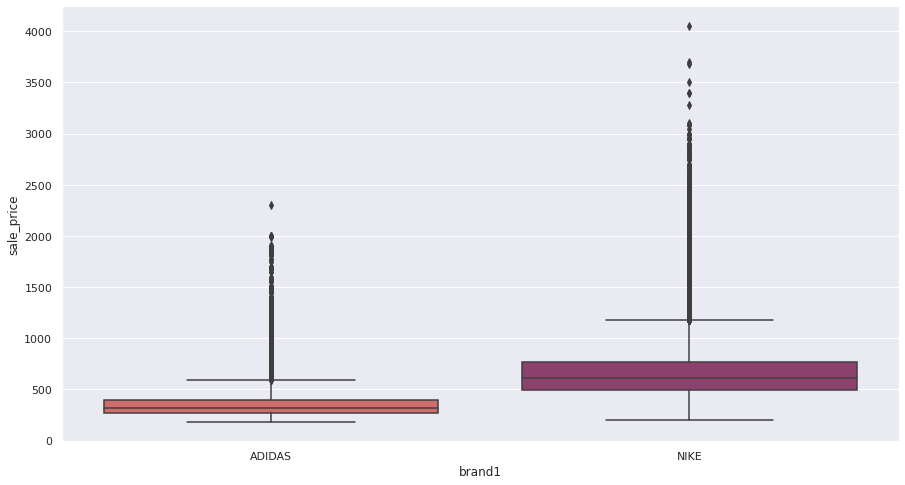

In [ ]:
sns.boxplot(x = 'brand1', y = 'sale_price', data = stockx_df, palette = 'flare' )

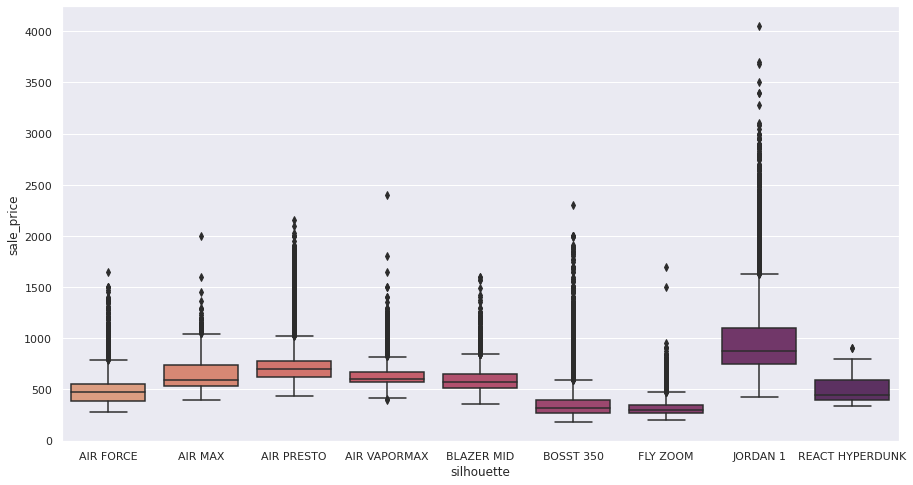

In [ ]:
sns.boxplot(x = 'silhouette', y = 'sale_price', data = stockx_df, palette = 'flare' )

In [ ]:
pd.crosstab(index = stockx_df['brand1'], columns = stockx_df['name_day'], margins = True).apply(lambda n:n/len(stockx_df) *100,axis = 1)

name_day,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,All
brand1,,,,,,,,
ADIDAS,13.129777,9.756293,10.747729,8.283645,10.502621,9.373124,10.400576,72.193765
NIKE,4.186842,3.983753,3.263436,2.817240,4.500980,4.023770,5.030213,27.806235
All,17.316619,13.740046,14.011165,11.100884,15.003602,13.396895,15.430790,100.000000


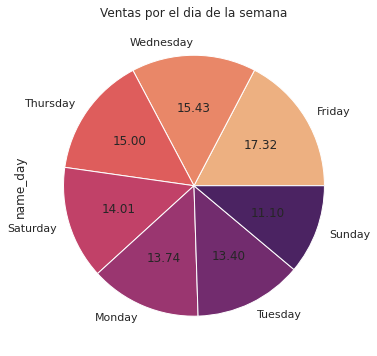

In [ ]:
plot = stockx_df['name_day'].value_counts().plot(kind='pie', autopct='%.2f', figsize=(6, 6),title='Ventas por el dia de la semana', colormap = 'flare')

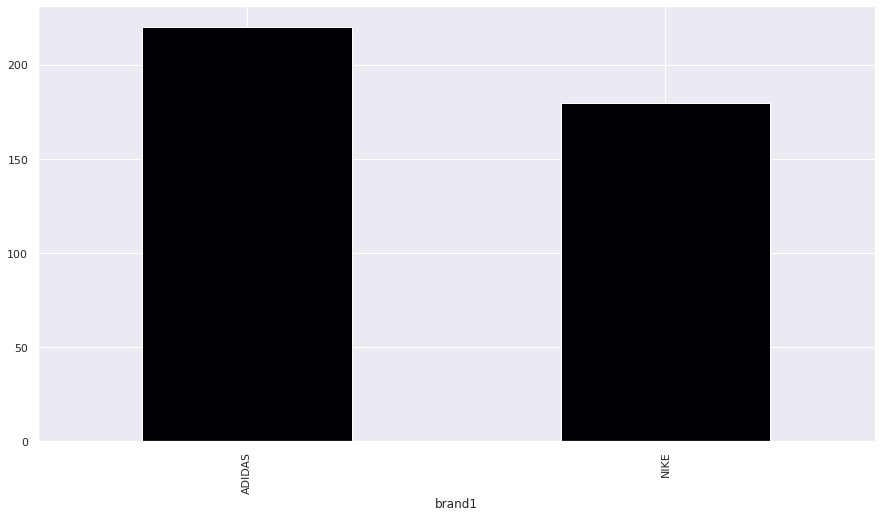

In [ ]:
round(stockx_df.groupby(["brand1"])["retail_price"].mean(),2).plot(kind = "bar", colormap = "inferno")

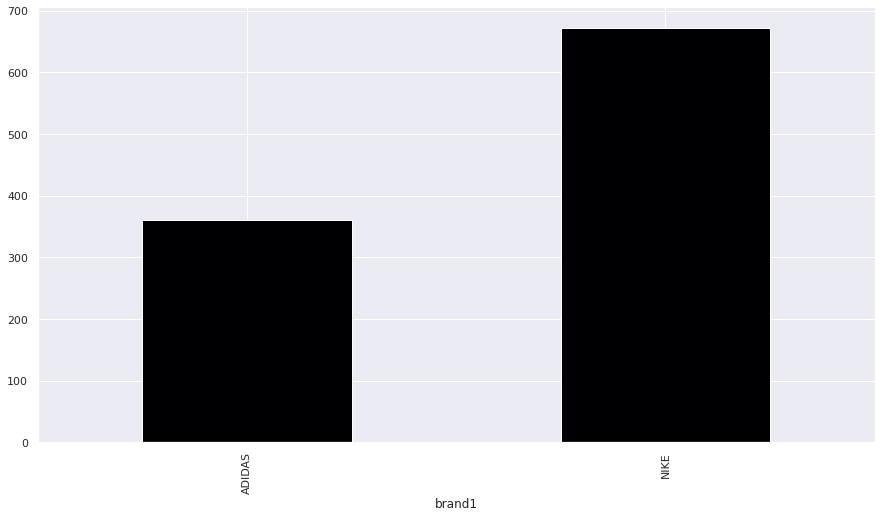

In [ ]:
round(stockx_df.groupby(["brand1"])["sale_price"].mean(),2).plot(kind = "bar", colormap = "inferno")

## Modelización 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f34c5f36790>,
      dtype=object)

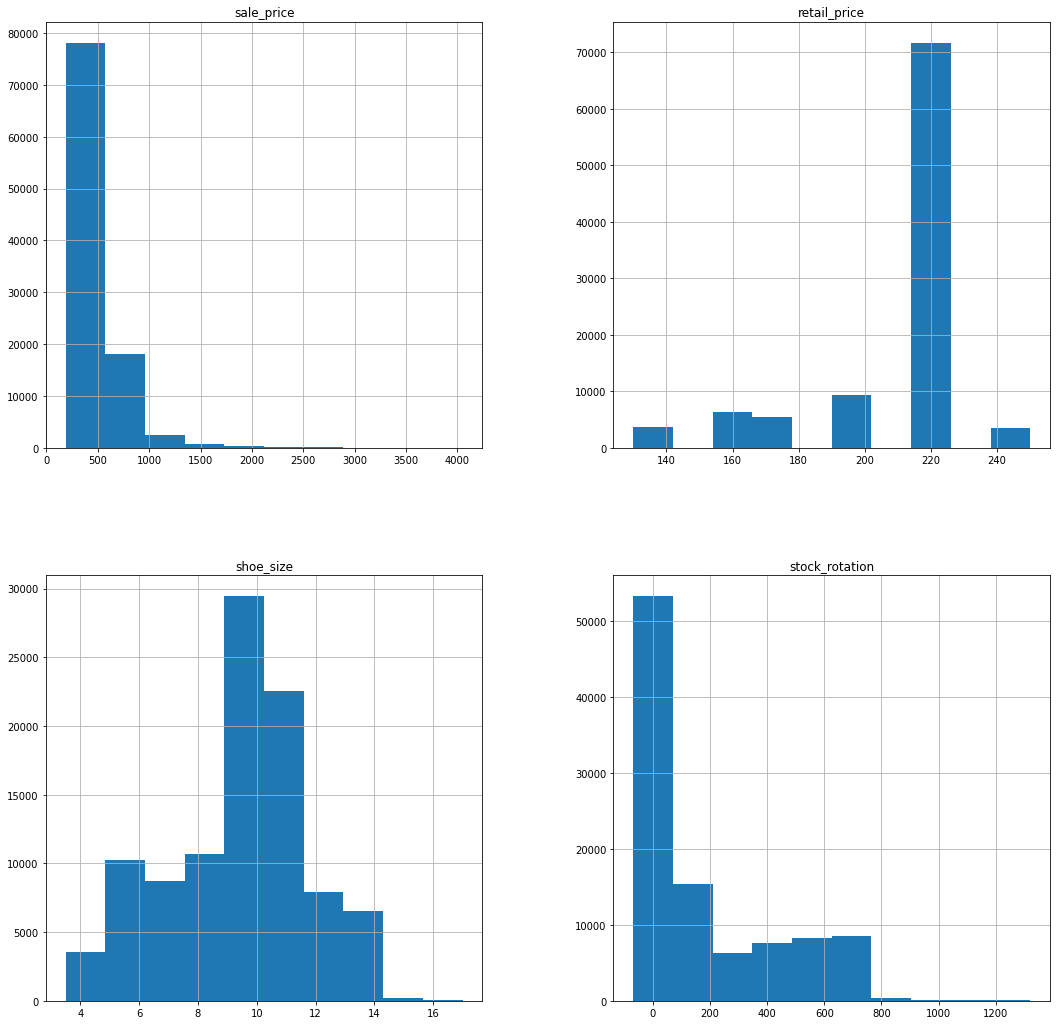

In [ ]:
#graficpos de distribucion de mis variables continuas 
stockx_df.loc[:,['sale_price', 'retail_price', 'shoe_size', 'stock_rotation']].hist( figsize=(18,18), xlabelsize='10', ylabelsize='10', xrot= 0 )

In [ ]:
stockx_corr= round(stockx_df.corr(),2) #el comando .corr de la libreria de regresion no permite observar la no multicolinealidad, para evitar que un dato este abserviendo la 
#informacion de los otros datos
stockx_corr

,sale_price,retail_price,shoe_size,stock_rotation
sale_price,1.00,-0.36,0.08,-0.09
retail_price,-0.36,1.00,-0.05,0.25
shoe_size,0.08,-0.05,1.00,0.02
stock_rotation,-0.09,0.25,0.02,1.00


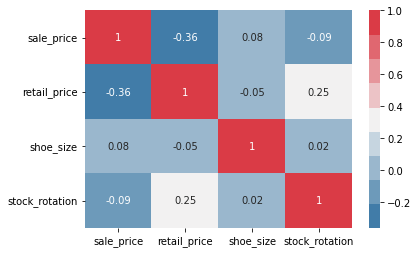

In [ ]:
sns.heatmap(stockx_corr, cmap = sns.diverging_palette(240, 10, n=9), annot= True) # el comando cmap= me permite definir el color de la paleta la cual es sns.diverging_palette 
#esta me permite tener los colores rojo para los valores mas alto apartir de la media ya zules para aquelloos que se alejan de la misma 

##### En el prtesente grafico de correlacion observamos que las variable no cuentan con una alta correlacion entre si lo que nos permite avanzar con el modelado 

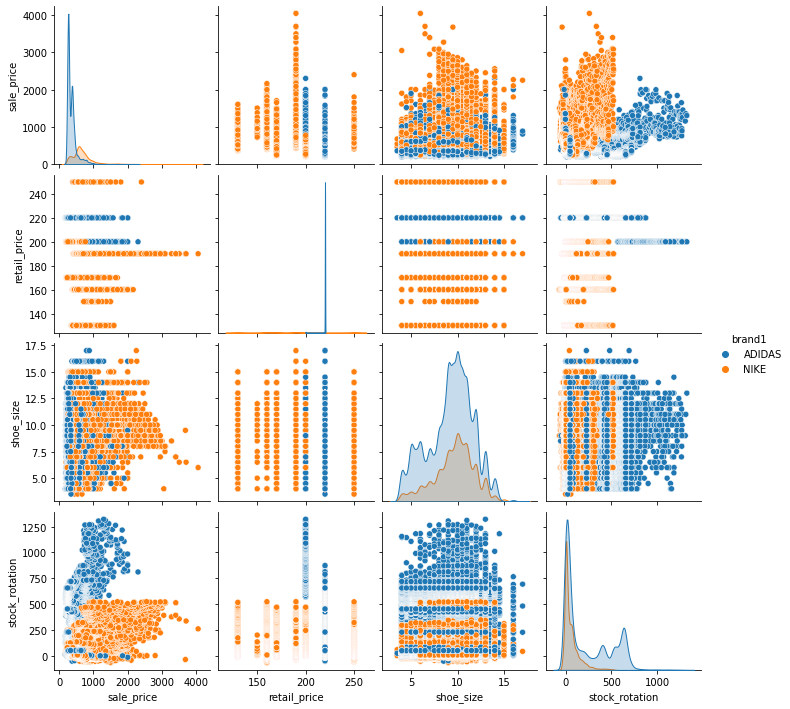

In [ ]:
sns.pairplot(stockx_df,hue='brand1')

In [ ]:
stockx_df.columns

Index(['order_date', 'sneaker_name', 'sale_price', 'retail_price',
       'release_date', 'shoe_size', 'buyer_region', 'brand1', 'colaboration',
       'silhouette', 'stock_rotation', 'day', 'month', 'year', 'day_of_week',
       'name_day'],
      dtype='object')

In [ ]:
X = stockx_df.loc[:,['retail_price','shoe_size', 'buyer_region', 'brand1', 'colaboration','silhouette', 'stock_rotation','name_day','month']]
X.shape

(99956, 9)

In [ ]:
X = pd.get_dummies(data = X , drop_first= True)
X.shape

(99956, 80)

In [ ]:
y = stockx_df.loc[:,'sale_price']
y.shape

(99956,)

### División del modelo en conjuntos de entrenamiento y prueba 

In [ ]:
from sklearn.model_selection import train_test_split #herramienta para validacion prueba entrebamiento

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

###Modelo de regresión 

In [ ]:
from sklearn.linear_model import LinearRegression #para realizar regresiones y modelos 
lreg = LinearRegression(fit_intercept=True)
lreg

LinearRegression()

In [ ]:
lreg.fit(X,y) 

LinearRegression()

In [ ]:
np.around(lreg.predict(X[0:100]),2)

array([435.12, 428.54, 428.54, 457.63, 389.81, 381.62, 425.91, 388.85,
       383.23, 392.3 , 397.31, 381.07, 381.58, 409.56, 385.03, 418.24,
       379.36, 396.18, 390.39, 364.01, 388.48, 392.94, 434.32, 403.19,
       469.63, 406.61, 401.25, 469.68, 423.34, 395.36, 414.27, 403.17,
       405.27, 425.87, 402.66, 405.5 , 399.08, 416.21, 467.66, 434.05,
       425.91, 411.46, 407.65, 419.76, 414.8 , 385.71, 394.47, 397.53,
       406.12, 392.62, 409.92, 396.53, 380.45, 391.43, 435.49, 403.27,
       406.73, 396.18, 402.48, 402.81, 397.68, 409.03, 378.55, 403.64,
       404.15, 404.93, 385.36, 402.08, 445.4 , 404.57, 413.25, 399.53,
       420.17, 404.73, 410.98, 433.47, 409.34, 406.4 , 405.48, 394.37,
       388.51, 411.35, 405.48, 380.79, 413.68, 426.58, 385.33, 379.56,
       398.99, 412.91, 398.99, 398.73, 429.26, 393.87, 398.66, 412.22,
       413.4 , 397.28, 415.23, 431.02])

In [ ]:
intercept = np.around(lreg.intercept_,2)
intercept

637.19

In [ ]:
r_2 = round(lreg.score(X,y),2)
print( 'El valor r cuadrdrado es de:', r_2)

El valor r cuadrdrado es de: 0.55


##### El modelo muestra un 33% de ajuste sin aver sido validado atarves de los conjuntos de test y prueba 

In [ ]:
import statsmodels.api as sm

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
OLS_model = sm.OLS(y, X)
results = OLS_model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:             sale_price   R-squared:                       0.546
Model:                            OLS   Adj. R-squared:                  0.546
Method:                 Least Squares   F-statistic:                     1540.
Date:                Sun, 20 Mar 2022   Prob (F-statistic):               0.00
Time:                        21:17:46   Log-Likelihood:            -6.5662e+05
No. Observations:               99956   AIC:                         1.313e+06
Df Residuals:                   99877   BIC:                         1.314e+06
Df Model:                          78                                         
Covariance Type:            nonrobust                                         
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
retail

#### Validación del modelo 

In [ ]:
lreg1 = LinearRegression(fit_intercept=True)
lreg1
lreg1.fit(X_train,y_train)
r_2 = round(lreg1.score(X_train,y_train),2)
print( 'El valor r cuadrdrado es de:', r_2)

El valor r cuadrdrado es de: 0.54


In [ ]:
lreg1 = LinearRegression(fit_intercept=True)
lreg1
lreg1.fit(X_test,y_test)
r_2 = round(lreg1.score(X_test,y_test),2)
print( 'El valor r cuadrdrado es de:', r_2)

El valor r cuadrdrado es de: 0.55


In [ ]:
np.around(lreg.predict(X_test),2)

array([382.1 , 319.51, 300.55, ..., 350.58, 346.82, 585.9 ])

### Modelo de bosque aleatorio 

In [ ]:
from sklearn.ensemble import RandomForestRegressor #herramienta para la creacion de bosque aleatorio de regresion

In [ ]:
stockx_forest = RandomForestRegressor(n_jobs = 5, oob_score= True, n_estimators= 100)
stockx_forest.fit(X_train,y_train)

RandomForestRegressor(n_jobs=5, oob_score=True)

In [ ]:
np.around(stockx_forest.predict(X_test),2)

array([248.93, 307.82, 285.25, ..., 376.44, 234.92, 537.67])

In [ ]:
score = round(stockx_forest.score(X_test,y_test),2)
print( 'El valor de ajuste del modelo es de:', score)

El valor de ajuste del modelo es de: 0.92


In [ ]:
list(zip(stockx_forest.feature_importances_))

[(0.03695818225348452,),
 (0.041444945396376116,),
 (0.2312613362420458,),
 (2.7842272346632942e-05,),
 (0.00042212960150603615,),
 (6.224918712562434e-05,),
 (0.0024348523566642064,),
 (0.0005696352753682692,),
 (0.00030893722685799237,),
 (0.00044387077008032163,),
 (7.667653164485712e-05,),
 (0.0015718812212931943,),
 (0.0007216373067356448,),
 (0.000211611993541358,),
 (9.788003803689763e-06,),
 (0.0006462685042697867,),
 (0.0003580132847447197,),
 (0.0003680379039425814,),
 (0.00011112737689950195,),
 (0.0013226856711991725,),
 (0.00012191171608900591,),
 (4.674782463190745e-05,),
 (0.0004074406833922627,),
 (0.0007539742473814715,),
 (0.0006780989442627871,),
 (0.0002333300091099107,),
 (4.192652829747534e-05,),
 (0.00017302529690645414,),
 (4.088806122590461e-05,),
 (9.966609067587304e-05,),
 (0.0005830962262097688,),
 (7.138244061835638e-05,),
 (0.0010925795135846843,),
 (6.368332535080705e-05,),
 (0.0022161282938943762,),
 (0.0004742036564631762,),
 (5.242832828496613e-06,),
 

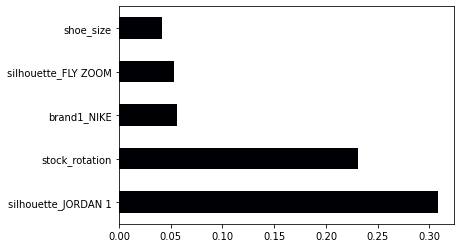

In [ ]:
feat_importance = pd.Series(stockx_forest.feature_importances_, index = X.columns[0:80])
feat_importance.nlargest(5).plot(kind = 'barh', colormap = "inferno") #obtengo las variables mas importantes del modelo 

### Metricas de los diferentes modelos 

In [ ]:
# Creo ;la figura donde veremos los diferentes Scores de los modelos.
import plotly.graph_objects as go

scores_tables = go.Figure(data=[go.Table(
    header=dict(values=['Linear Scores', 'Random Forest Scores'],
                line_color='darkslategray',
                fill_color='lightgray',
                align='left'), cells=dict(values=[[r_2], # 1st column
                       [score]], # 2nd column
               line_color='darkslategray',
               fill_color='lightgray',
               align='left'))
])

scores_tables